# 1- IMPORTAR LIBRERÍAS

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter
import nltk

In [22]:
# Descargar recursos de NLTK
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

* Configuración

In [23]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


# 2 - CARGAR DATOS

In [24]:
print("📂 Cargando dataset...")

# IMPORTANTE: Asegúrate de subir el archivo CSV a Colab primero
try:
    df = pd.read_csv('/content/dataset_sentimientos_ecom.csv')
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
except FileNotFoundError:
    print("❌ ERROR: Archivo no encontrado")
    print("👉 Sube el archivo 'dataset_sentimientos_eco_Cristo.csv' a Colab")
    print("   Usa el botón de carpeta 📁 en el panel izquierdo")

📂 Cargando dataset...
✅ Dataset cargado exitosamente
📊 Dimensiones: 1000 filas x 4 columnas


3 - EXPLORACIÓN INICIAL

In [25]:
print("\n" + "="*70)
print("📊 EXPLORACIÓN INICIAL DE DATOS")
print("="*70)

# Información general
print("\n1️⃣ INFORMACIÓN DEL DATASET:")
print(df.info())

# Primeras filas
print("\n2️⃣ PRIMERAS 10 FILAS:")
print(df.head(10))

# Estadísticas descriptivas
print("\n3️⃣ ESTADÍSTICAS DE CONFIANZA:")
print(df['confianza'].describe())

# Verificar valores nulos
print("\n4️⃣ VALORES NULOS:")
print(df.isnull().sum())

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\n5️⃣ DUPLICADOS: {duplicados}")


📊 EXPLORACIÓN INICIAL DE DATOS

1️⃣ INFORMACIÓN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   texto        1000 non-null   object 
 2   sentimiento  1000 non-null   object 
 3   confianza    1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None

2️⃣ PRIMERAS 10 FILAS:
   id                                             texto sentimiento  confianza
0   1     El servicio al cliente es pésimo, no ayudan 😊    negativo       0.85
1   2    Vino incompleto y faltaban piezas importantes.    negativo       0.82
2   3     Estoy esperando reembolso desde hace semanas!    negativo       0.96
3   4             Tardanza excesiva y producto mediocre    negativo       0.97
4   5         No cumple con lo prometido, decepcionante    negativo       0.86
5   6          

# 5: ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS


📈 ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS

📊 Distribución absoluta:
sentimiento
positivo    400
negativo    350
neutro      250
Name: count, dtype: int64

📊 Distribución porcentual:
sentimiento
positivo    40.0
negativo    35.0
neutro      25.0
Name: proportion, dtype: float64


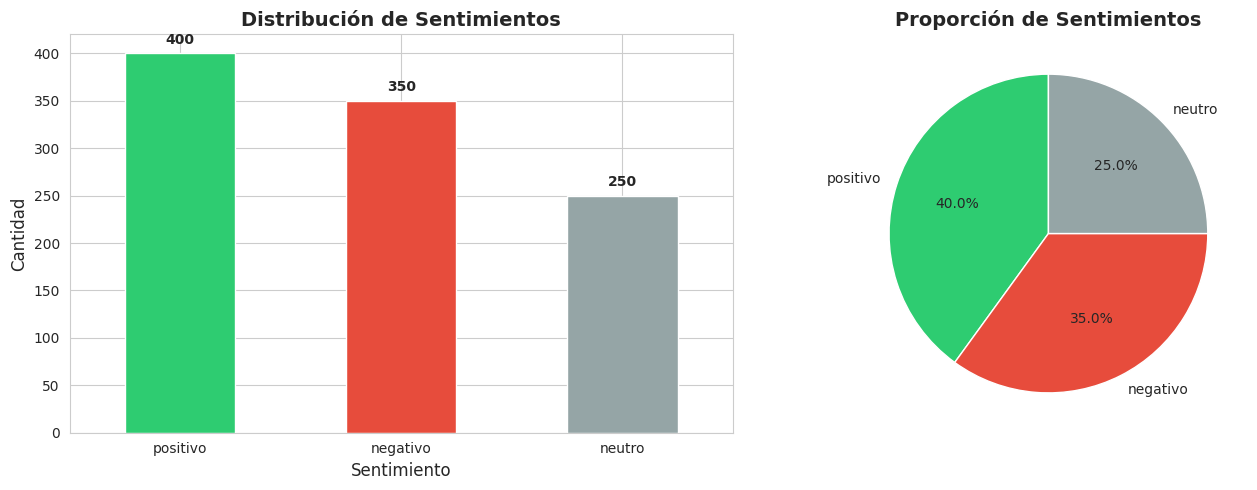


✅ Gráfico guardado: 'distribucion_sentimientos.png'


In [26]:
print("\n" + "="*70)
print("📈 ANÁLISIS DE DISTRIBUCIÓN DE SENTIMIENTOS")
print("="*70)

# Conteo por sentimiento
print("\n📊 Distribución absoluta:")
conteo = df['sentimiento'].value_counts()
print(conteo)

print("\n📊 Distribución porcentual:")
porcentaje = df['sentimiento'].value_counts(normalize=True) * 100
print(porcentaje.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
conteo.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[0].set_title('Distribución de Sentimientos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Añadir valores sobre las barras
for i, v in enumerate(conteo):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
axes[1].pie(conteo, labels=conteo.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Proporción de Sentimientos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('distribucion_sentimientos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'distribucion_sentimientos.png'")


# 5 - ANÁLISIS DE LONGITUD DE TEXTOS


📏 ANÁLISIS DE LONGITUD DE TEXTOS

📊 ESTADÍSTICAS DE LONGITUD (CARACTERES):
             count       mean       std   min    25%   50%   75%   max
sentimiento                                                           
negativo     350.0  40.557143  4.509893  29.0  38.00  40.0  44.0  52.0
neutro       250.0  37.612000  5.148932  28.0  34.25  37.0  41.0  49.0
positivo     400.0  39.747500  5.956715  31.0  36.00  39.0  41.0  58.0

📊 ESTADÍSTICAS DE LONGITUD (PALABRAS):
             count      mean       std  min  25%  50%  75%   max
sentimiento                                                     
negativo     350.0  6.554286  1.035845  4.0  6.0  7.0  7.0   9.0
neutro       250.0  6.284000  1.110078  4.0  6.0  6.0  7.0  10.0
positivo     400.0  6.142500  1.133758  3.0  5.0  6.0  7.0   9.0


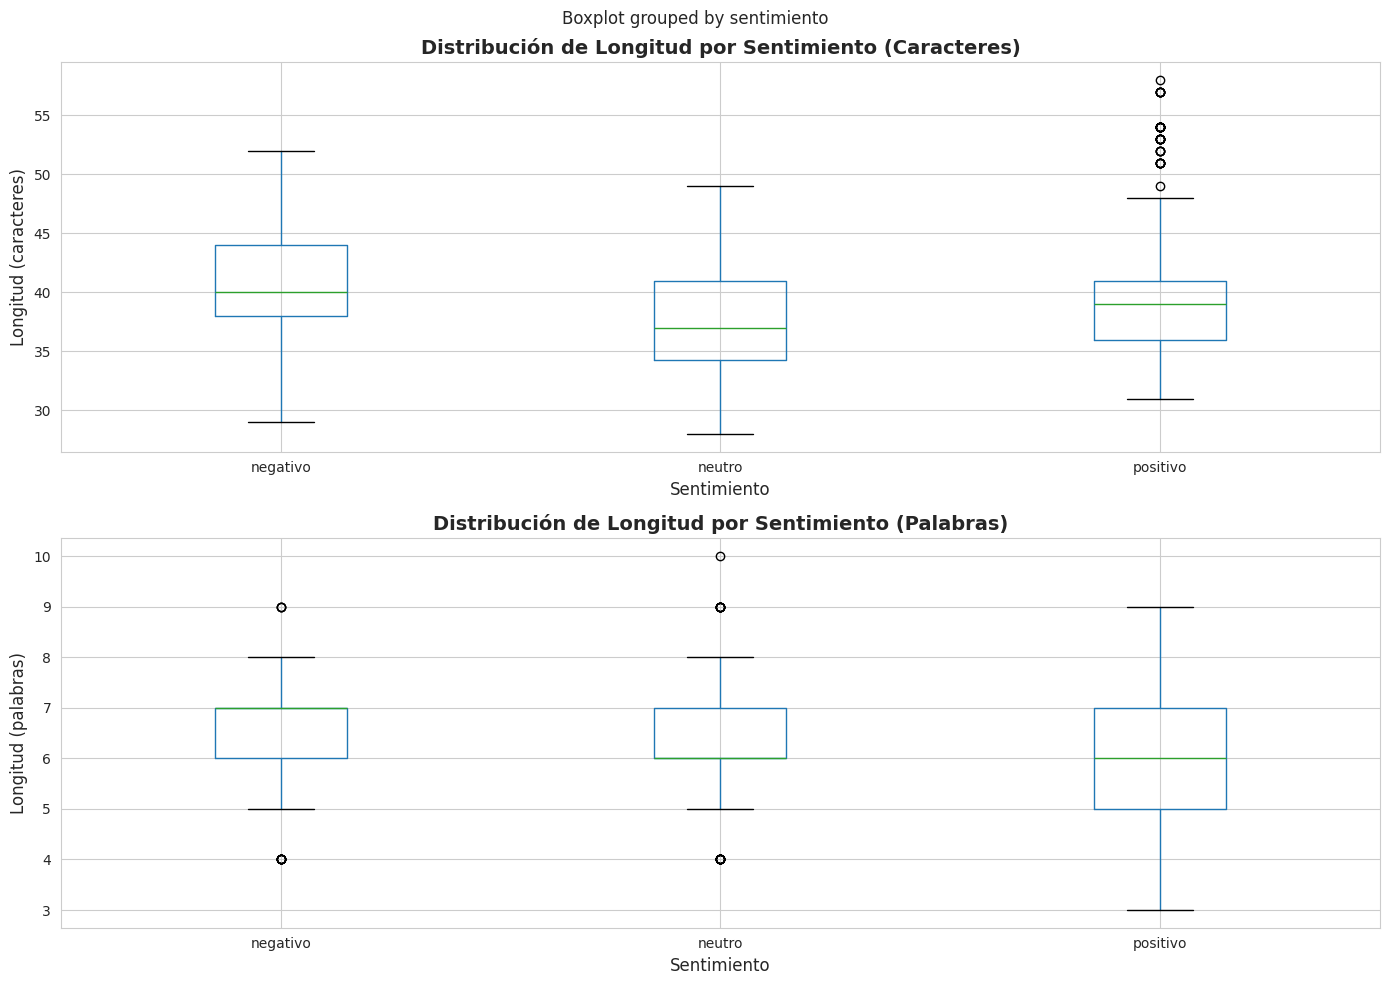


✅ Gráfico guardado: 'analisis_longitud_textos.png'


In [27]:
print("\n" + "="*70)
print("📏 ANÁLISIS DE LONGITUD DE TEXTOS")
print("="*70)

# Calcular longitudes
df['longitud_caracteres'] = df['texto'].str.len()
df['longitud_palabras'] = df['texto'].str.split().str.len()

# Estadísticas por sentimiento
print("\n📊 ESTADÍSTICAS DE LONGITUD (CARACTERES):")
print(df.groupby('sentimiento')['longitud_caracteres'].describe())

print("\n📊 ESTADÍSTICAS DE LONGITUD (PALABRAS):")
print(df.groupby('sentimiento')['longitud_palabras'].describe())

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Distribución por caracteres
df.boxplot(column='longitud_caracteres', by='sentimiento', ax=axes[0])
axes[0].set_title('Distribución de Longitud por Sentimiento (Caracteres)',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Longitud (caracteres)', fontsize=12)
plt.sca(axes[0])
plt.xticks(rotation=0)

# Distribución por palabras
df.boxplot(column='longitud_palabras', by='sentimiento', ax=axes[1])
axes[1].set_title('Distribución de Longitud por Sentimiento (Palabras)',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentimiento', fontsize=12)
axes[1].set_ylabel('Longitud (palabras)', fontsize=12)
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('analisis_longitud_textos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'analisis_longitud_textos.png'")


6 - FUNCIÓN DE LIMPIEZA DE TEXTO

In [28]:
print("\n" + "="*70)
print("🧹 CREANDO FUNCIÓN DE LIMPIEZA DE TEXTO")
print("="*70)

def limpiar_texto(texto):
    """
    Limpia y normaliza el texto para procesamiento

    Pasos:
    1. Convierte a minúsculas
    2. Elimina URLs
    3. Elimina menciones y hashtags
    4. Elimina emojis y símbolos especiales
    5. Elimina números
    6. Elimina puntuación
    7. Elimina espacios múltiples
    """
    if not isinstance(texto, str):
        return ""

    # Minúsculas
    texto = texto.lower()

    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)

    # Eliminar menciones y hashtags
    texto = re.sub(r'@\w+|#\w+', '', texto)

    # Eliminar emojis y símbolos
    texto = re.sub(r'[^\w\s]', '', texto)

    # Eliminar números
    texto = re.sub(r'\d+', '', texto)

    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Aplicar limpieza
print("🔄 Aplicando limpieza a todos los textos...")
df['texto_limpio'] = df['texto'].apply(limpiar_texto)

# Mostrar ejemplos
print("\n📝 EJEMPLOS DE LIMPIEZA:")
print("="*70)
for i in range(5):
    print(f"\nEjemplo {i+1}:")
    print(f"Original:  {df.iloc[i]['texto']}")
    print(f"Limpio:    {df.iloc[i]['texto_limpio']}")

print("\n✅ Limpieza completada")

# ============================================================================
# CELDA 8: ELIMINACIÓN DE STOPWORDS
# ============================================================================
print("\n" + "="*70)
print("🚫 ELIMINACIÓN DE STOPWORDS (PALABRAS VACÍAS)")
print("="*70)

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Añadir palabras personalizadas si es necesario
palabras_adicionales = {'si', 'no', 'muy', 'mas', 'pero'}
stop_words.update(palabras_adicionales)

print(f"📊 Total de stopwords: {len(stop_words)}")
print(f"Ejemplos: {list(stop_words)[:20]}")

def eliminar_stopwords(texto):
    """Elimina palabras vacías del texto"""
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if p not in stop_words and len(p) > 2]
    return ' '.join(palabras_filtradas)

# Aplicar eliminación de stopwords
print("\n🔄 Eliminando stopwords...")
df['texto_procesado'] = df['texto_limpio'].apply(eliminar_stopwords)

# Verificar que no quedaron textos vacíos
textos_vacios = (df['texto_procesado'].str.len() == 0).sum()
print(f"\n📊 Textos vacíos después del procesamiento: {textos_vacios}")

if textos_vacios > 0:
    print("⚠️  Reemplazando textos vacíos con versión limpia...")
    df.loc[df['texto_procesado'].str.len() == 0, 'texto_procesado'] = \
        df.loc[df['texto_procesado'].str.len() == 0, 'texto_limpio']

# Mostrar ejemplos
print("\n📝 EJEMPLOS DE PROCESAMIENTO:")
print("="*70)
for i in range(5):
    print(f"\nEjemplo {i+1}:")
    print(f"Limpio:      {df.iloc[i]['texto_limpio']}")
    print(f"Procesado:   {df.iloc[i]['texto_procesado']}")

print("\n✅ Stopwords eliminadas")


🧹 CREANDO FUNCIÓN DE LIMPIEZA DE TEXTO
🔄 Aplicando limpieza a todos los textos...

📝 EJEMPLOS DE LIMPIEZA:

Ejemplo 1:
Original:  El servicio al cliente es pésimo, no ayudan 😊
Limpio:    el servicio al cliente es pésimo no ayudan

Ejemplo 2:
Original:  Vino incompleto y faltaban piezas importantes.
Limpio:    vino incompleto y faltaban piezas importantes

Ejemplo 3:
Original:  Estoy esperando reembolso desde hace semanas!
Limpio:    estoy esperando reembolso desde hace semanas

Ejemplo 4:
Original:  Tardanza excesiva y producto mediocre
Limpio:    tardanza excesiva y producto mediocre

Ejemplo 5:
Original:  No cumple con lo prometido, decepcionante
Limpio:    no cumple con lo prometido decepcionante

✅ Limpieza completada

🚫 ELIMINACIÓN DE STOPWORDS (PALABRAS VACÍAS)
📊 Total de stopwords: 315
Ejemplos: ['estaba', 'estuve', 'esta', 'tuviera', 'éramos', 'tuvieseis', 'tuvieran', 'que', 'o', 'seréis', 'pero', 'habré', 'habrán', 'teníais', 'un', 'tuvieses', 'fuese', 'ellas', 'fueseis', 'te

# 8 - ANÁLISIS DE PALABRAS MÁS FRECUENTES


📊 ANÁLISIS DE PALABRAS MÁS FRECUENTES

🔹 TOP 15 PALABRAS - POSITIVO:
   producto: 114
   calidad: 67
   compra: 46
   perfecto: 36
   excelente: 36
   bien: 33
   problema: 26
   mejor: 25
   resistente: 24
   justo: 23
   superó: 20
   expectativas: 20
   recomendado: 20
   exactamente: 18
   satisfecho: 18

🔹 TOP 15 PALABRAS - NEGATIVO:
   producto: 108
   calidad: 63
   compren: 32
   llegó: 30
   sirve: 25
   vendedor: 25
   pésima: 23
   mala: 23
   recomiendo: 22
   estafa: 20
   servicio: 19
   cumple: 18
   dinero: 18
   mensajes: 18
   incompleto: 17

🔹 TOP 15 PALABRAS - NEUTRO:
   producto: 60
   cumple: 33
   bien: 31
   precio: 28
   estándar: 27
   tampoco: 23
   aceptable: 21
   funciona: 19
   normal: 18
   mercado: 18
   calidad: 18
   malo: 17
   básico: 15
   mínimo: 15
   quejas: 15


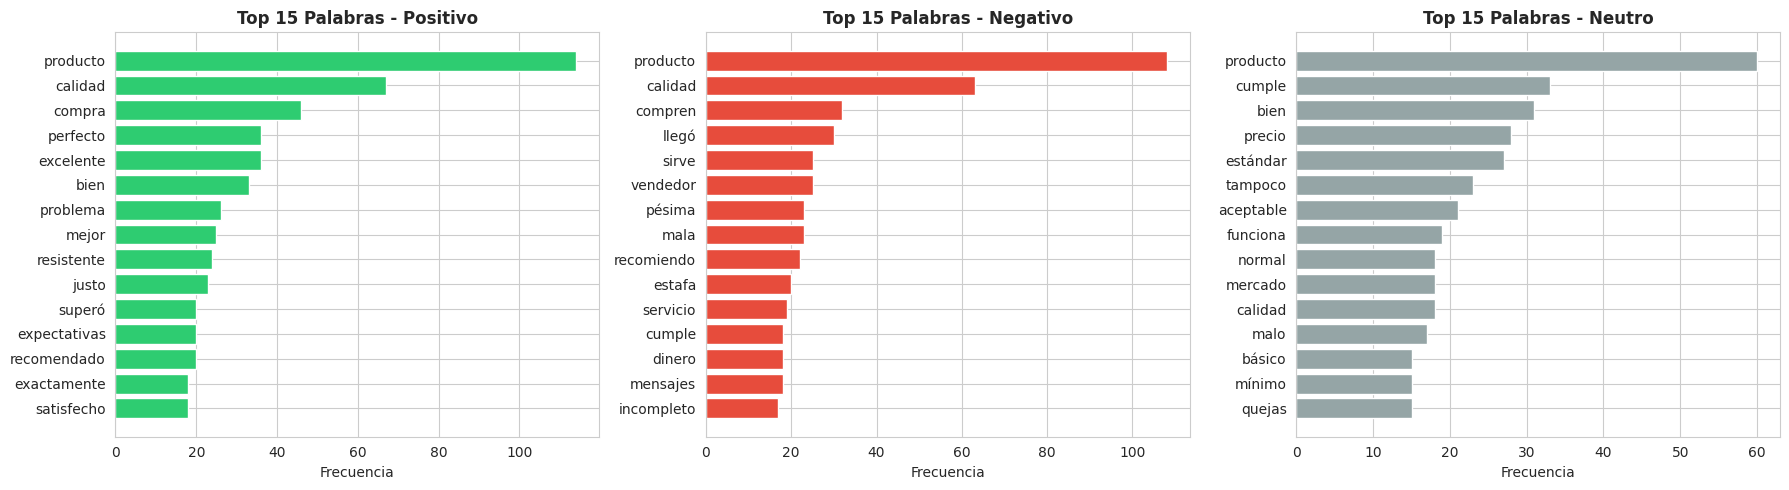


✅ Gráfico guardado: 'palabras_frecuentes.png'


In [29]:
print("\n" + "="*70)
print("📊 ANÁLISIS DE PALABRAS MÁS FRECUENTES")
print("="*70)

def obtener_palabras_frecuentes(df, sentimiento, top_n=20):
    """Obtiene las palabras más frecuentes por sentimiento"""
    textos = df[df['sentimiento'] == sentimiento]['texto_procesado']
    todas_palabras = ' '.join(textos).split()
    return Counter(todas_palabras).most_common(top_n)

# Analizar cada sentimiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, sentimiento in enumerate(['positivo', 'negativo', 'neutro']):
    palabras_freq = obtener_palabras_frecuentes(df, sentimiento, top_n=15)

    print(f"\n🔹 TOP 15 PALABRAS - {sentimiento.upper()}:")
    for palabra, freq in palabras_freq:
        print(f"   {palabra}: {freq}")

    # Visualización
    palabras, frecuencias = zip(*palabras_freq)
    axes[idx].barh(palabras, frecuencias, color=['#2ecc71', '#e74c3c', '#95a5a6'][idx])
    axes[idx].set_title(f'Top 15 Palabras - {sentimiento.capitalize()}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frecuencia', fontsize=10)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.savefig('palabras_frecuentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: 'palabras_frecuentes.png'")


# 9-  GUARDAR DATOS PROCESADOS

In [42]:
print("\n" + "="*70)
print("💾 GUARDANDO DATOS PROCESADOS")
print("="*70)

# Seleccionar columnas importantes
df_procesado = df[['id', 'texto', 'texto_procesado', 'sentimiento',
                    'longitud_caracteres', 'longitud_palabras']]

# Guardar CSV procesado
archivo_procesado = 'dataset_procesado.csv'
df_procesado.to_csv(archivo_procesado, index=False, encoding='utf-8')

print(f"✅ Archivo guardado: {archivo_procesado}")
print(f"📊 Dimensiones: {df_procesado.shape}")

# Mostrar resumen final
print("\n📋 RESUMEN DEL PROCESAMIENTO:")
print("="*70)
print(f"✓ Total de registros: {len(df_procesado)}")
print(f"✓ Sentimientos únicos: {df_procesado['sentimiento'].nunique()}")
print(f"✓ Longitud promedio (palabras): {df_procesado['longitud_palabras'].mean():.1f}")
print(f"✓ Textos procesados correctamente: {(df_procesado['texto_procesado'].str.len() > 0).sum()}")

print("\n" + "="*70)
print("🎉 NOTEBOOK 1 COMPLETADO")
print("="*70)
print("\n📌 PRÓXIMO PASO:")
print("   Ejecutar Base_Sentim_25 2: Entrenamiento del Modelo")
print("="*70)


💾 GUARDANDO DATOS PROCESADOS
✅ Archivo guardado: dataset_procesado.csv
📊 Dimensiones: (1000, 6)

📋 RESUMEN DEL PROCESAMIENTO:
✓ Total de registros: 1000
✓ Sentimientos únicos: 3
✓ Longitud promedio (palabras): 6.3
✓ Textos procesados correctamente: 1000

🎉 NOTEBOOK 1 COMPLETADO

📌 PRÓXIMO PASO:
   Ejecutar Base_Sentim_25 2: Entrenamiento del Modelo
